In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import math

In [16]:
pic_1 = np.empty((3,3,3))
pic_1[:,:] = [1,0,0]
pic_1[0,0] = [0,1,1]

pic_2 = np.empty((3,3,3))
pic_2[:,:] = [1,0,0]
pic_2[1,1] = [1,1,1]

pic_3 = np.empty((3,3,3))
pic_3[:,:] = [1,0,0]
pic_3[2,2] = [1,0,1]

pics = [pic_1, pic_2, pic_3]

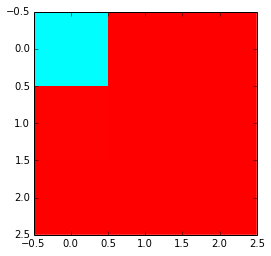

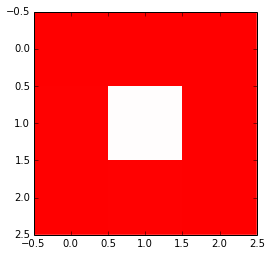

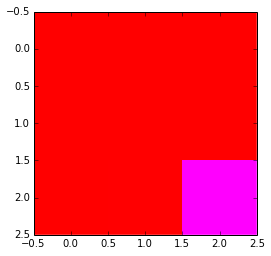

In [19]:
for pic in pics:
    plt.imshow(pic, interpolation='none')
    plt.figure()

In [52]:
def maxDist(pixels):
    furthest = (-1, pixels[0])
    calDist = lambda x, y: np.sum([(x[i] - y[i])**2 for i in xrange(len(x))])
    for i, pixel in enumerate(pixels):
        acc = 0
        for others in pixels:
            acc += calDist(pixel, others)
        if acc > furthest[0]:
            furthest = (acc, pixel)
    return furthest[1]

def merge(pics):
    w, h, d = pics[0].shape
    pic_m = np.zeros(pics[0].shape)
    for i in xrange(w):
        for j in xrange(h):
            pic_m[i,j] = maxDist([pic[i,j] for pic in pics])
    return pic_m

In [53]:
pic_m = merge(pics)

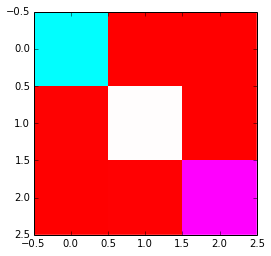

In [54]:
plt.imshow(pic_m, interpolation='none')
plt.figure()

In [57]:
def readImg(name):
    return plt.imread('/Users/SamX/Desktop/NumMeth/CantSleep/' + name)

pic1 = readImg('pic_1.png')
pic2 = readImg('pic_2.png')
pic3 = readImg('pic_3.png')
pics=[pic1,pic2,pic3]

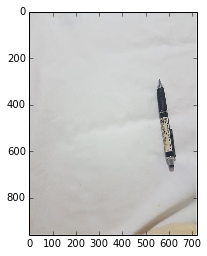

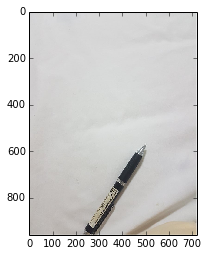

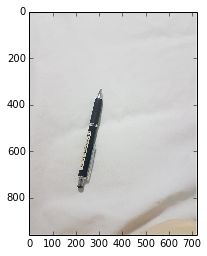

In [58]:
for pic in pics:
    plt.imshow(pic, interpolation='none')
    plt.figure()

In [59]:
pic_m = merge(pics)

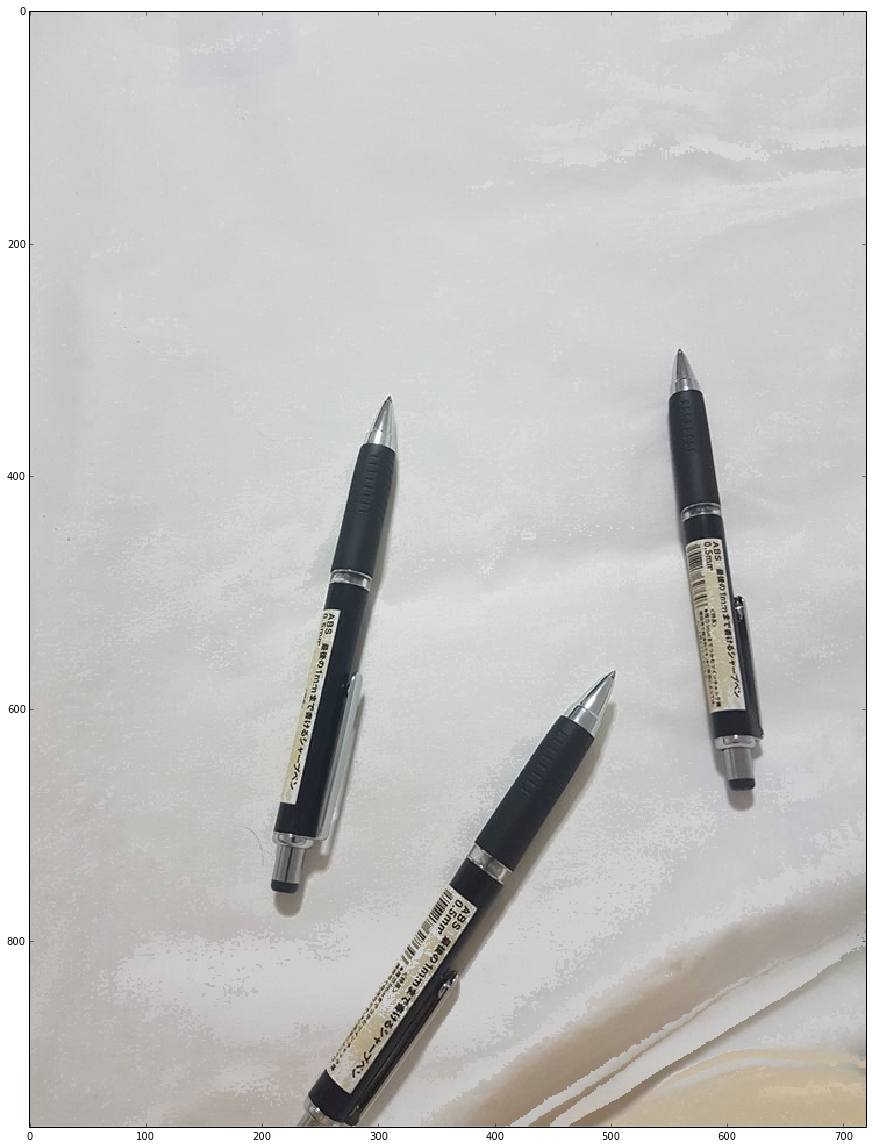

In [65]:
plt.figure(figsize=(20,20))
plt.imshow(pic_m, interpolation='none')
plt.savefig("merge")